In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

In [2]:
import tensorflow as tf
from tensorflow import keras

In [3]:
print(keras.__version__)
print(tf.__version__)

2.9.0
2.9.1


In [4]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

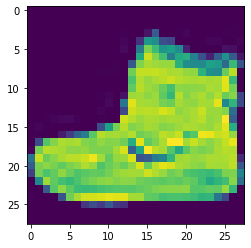

In [5]:
plt.imshow(X_train_full[0])

In [6]:
y_train_full[1]

0

    Label 	Description
    0 	T-shirt/top
    1 	Trouser
    2 	Pullover
    3 	Dress
    4 	Coat
    5 	Sandal
    6 	Shirt
    7 	Sneaker
    8 	Bag
    9 	Ankle boot

In [7]:
class_name = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [8]:
class_name[y_train_full[0]]

'Ankle boot'

In [9]:
#Random code I wrote to inspect the contents of y_train_full

from IPython.display import clear_output

def callRecurrsion(i):
    
    if i >= 0:
        print(y_train_full[i])

    else:
        return 0

    return callRecurrsion(i-1)

#callRecurrsion(59999)
clear_output()


Dress


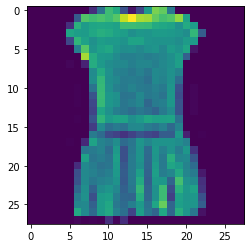

In [10]:
#print images and type together

n = 3

print(class_name[y_train_full[n]])
plt.imshow(X_train_full[n])

In [11]:
#To see numerical pixel values
X_train_full[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
          1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
          0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
          0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
         10,   0],
       [  

Data Normalization 

Putting all the data into a scale of 0-1 for easy understanding. 

In [12]:
X_train_n = X_train_full / 255.0 #Noramlized full trainig dataset
X_test_n = X_test/ 255.0 #

        Split Data into training, validation, and testing. 

        Training - Establish a ground for weight and biases
        Validation - Tuning hyperparameters more accurately
        Testing - An actual graded test to see if that model performed accordingly


In [13]:
X_train, X_valid = X_train_n[5000:], X_train_n[:5000]
Y_train, Y_valid = y_train_full[5000:], y_train_full[:5000]

#X_test = X_test_n tbh I find this line redundant and I'm not quite sure if the original dataset gets changed. For that reason continue
#using X_test_n for testing instead. 

Learning to create neural network models:
* Sequential Model
* Functional API

In [14]:
#Break to Load Model

In [15]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28,28]))
model.add(keras.layers.Dense(300, activation = "relu"))
model.add(keras.layers.Dense(100, activation = "relu"))
model.add(keras.layers.Dense(10, activation = "softmax"))

In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 300)               235500    
                                                                 
 dense_1 (Dense)             (None, 100)               30100     
                                                                 
 dense_2 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [17]:
import pydot #Neural Network Visualization
keras.utils.plot_model(model)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model/model_to_dot to work.


In [18]:
weights, biases  = model.layers[1].get_weights() #The number specifies which layer the weights are received from

#In this case the second [from the top] layer which is Dense (bcs python is 0 index)

In [19]:
weights

array([[ 0.02095098, -0.03537794, -0.05152591, ..., -0.04581601,
         0.04210117,  0.03497004],
       [ 0.02157398, -0.02329314, -0.02980422, ..., -0.06191863,
         0.00427445,  0.0424165 ],
       [ 0.06747918, -0.0448298 ,  0.02154455, ...,  0.00985073,
        -0.03394065,  0.00535137],
       ...,
       [ 0.00781202,  0.06601195,  0.06286235, ...,  0.07117523,
        -0.03996569, -0.06501906],
       [ 0.03022704, -0.06620851,  0.0250944 , ...,  0.02210411,
         0.00632456,  0.00322063],
       [ 0.06454608,  0.00879622, -0.04788382, ..., -0.001623  ,
         0.07412839, -0.02800736]], dtype=float32)

In [20]:
weights.shape

(784, 300)

In [21]:
biases #All start at zero

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [22]:
for m in model.layers:
    print(m.name)
    print(m.get_weights())

flatten
[]
dense
[array([[ 0.02095098, -0.03537794, -0.05152591, ..., -0.04581601,
         0.04210117,  0.03497004],
       [ 0.02157398, -0.02329314, -0.02980422, ..., -0.06191863,
         0.00427445,  0.0424165 ],
       [ 0.06747918, -0.0448298 ,  0.02154455, ...,  0.00985073,
        -0.03394065,  0.00535137],
       ...,
       [ 0.00781202,  0.06601195,  0.06286235, ...,  0.07117523,
        -0.03996569, -0.06501906],
       [ 0.03022704, -0.06620851,  0.0250944 , ...,  0.02210411,
         0.00632456,  0.00322063],
       [ 0.06454608,  0.00879622, -0.04788382, ..., -0.001623  ,
         0.07412839, -0.02800736]], dtype=float32), array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.

In [23]:
model.compile(loss="sparse_categorical_crossentropy", optimizer="sgd", metrics=["accuracy"])

In [24]:
model_history = model.fit(X_train, Y_train, epochs=50, validation_data=(X_valid, Y_valid))

Epoch 1/50
1719/1719 [==============================] - 6s 3ms/step - loss: 0.7247 - accuracy: 0.7656 - val_loss: 0.5140 - val_accuracy: 0.8244
Epoch 2/50
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4873 - accuracy: 0.8312 - val_loss: 0.4621 - val_accuracy: 0.8460
Epoch 3/50
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4431 - accuracy: 0.8447 - val_loss: 0.4089 - val_accuracy: 0.8620
Epoch 4/50
1719/1719 [==============================] - 4s 2ms/step - loss: 0.4158 - accuracy: 0.8538 - val_loss: 0.3984 - val_accuracy: 0.8668
Epoch 5/50
1719/1719 [==============================] - 6s 3ms/step - loss: 0.3953 - accuracy: 0.8615 - val_loss: 0.3763 - val_accuracy: 0.8724
Epoch 6/50
1719/1719 [==============================] - 4s 3ms/step - loss: 0.3791 - accuracy: 0.8666 - val_loss: 0.3977 - val_accuracy: 0.8590
Epoch 7/50
1719/1719 [==============================] - 4s 2ms/step - loss: 0.3645 - accuracy: 0.8712 - val_loss: 0.3659 - val_accuracy:

In [25]:
model_history.params

{'verbose': 1, 'epochs': 50, 'steps': 1719}

In [26]:
model_history.history

{'loss': [0.724703311920166,
  0.48731574416160583,
  0.44305530190467834,
  0.4158252477645874,
  0.3952535390853882,
  0.37912777066230774,
  0.3644665479660034,
  0.3524553179740906,
  0.3418034017086029,
  0.3331136107444763,
  0.32435762882232666,
  0.31666988134384155,
  0.30887484550476074,
  0.30337950587272644,
  0.29645416140556335,
  0.2898513078689575,
  0.2840307652950287,
  0.280232310295105,
  0.2737376093864441,
  0.2697349190711975,
  0.26461663842201233,
  0.25955167412757874,
  0.25618863105773926,
  0.2499837875366211,
  0.24713675677776337,
  0.24259985983371735,
  0.23925361037254333,
  0.2338317483663559,
  0.23057375848293304,
  0.2262563407421112,
  0.2233962118625641,
  0.21803557872772217,
  0.2161785364151001,
  0.21210406720638275,
  0.2097933292388916,
  0.20638243854045868,
  0.20260198414325714,
  0.19894199073314667,
  0.19648921489715576,
  0.19272884726524353,
  0.19028830528259277,
  0.1870114654302597,
  0.1854093074798584,
  0.1803365796804428,
  0

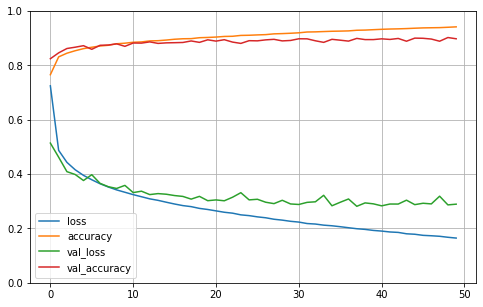

In [27]:
import pandas as pd

pd.DataFrame(model_history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

In [28]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 71.9477 - accuracy: 0.8511


[71.94772338867188, 0.8511000275611877]

In [29]:
X_small = X_test_n[:3]

In [42]:
#Show the predicted value of each output

y_proba = model.predict(X_small)
y_proba.round(2)

1/1 [==============================] - 0s 40ms/step


array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [43]:
y_inclass = np.argmax(y_proba, axis=1)
print(y_inclass)

[9 2 1]


In [32]:
np.array(class_name)[y_inclass]

array(['Ankle boot', 'Pullover', 'Trouser'], dtype='<U11')

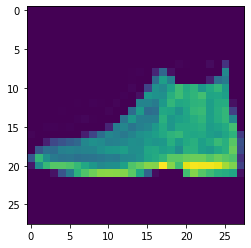

In [35]:
plt.imshow(X_test[0])


**HOW TO SAVE AND RELOAD MODELS - THEY ALREADY SAVE THE WEIGHTS FOR YOU. Thank God this exists.**

In [37]:
model.save('imageclassifier_model.h5')

In [38]:
del model

In [39]:
model = keras.models.load_model("imageclassifier_model.h5")
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 300)               235500    
                                                                 
 dense_1 (Dense)             (None, 100)               30100     
                                                                 
 dense_2 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________
